Read in the relevant imports below:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans

Let's explore the wholesale customer dataset from 2011.

The data set refers to clients of a wholesale distributor. It includes the annual spending according to certain categories:
    
https://archive.ics.uci.edu/ml/datasets/wholesale+customers
        

In [43]:
df = pd.read_csv('data/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


1. Scale the data and then plot the number of clusters versus the inertia for cluster sizes of 1 to 10 to find that the elbow of the curve occurs at k=2:

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


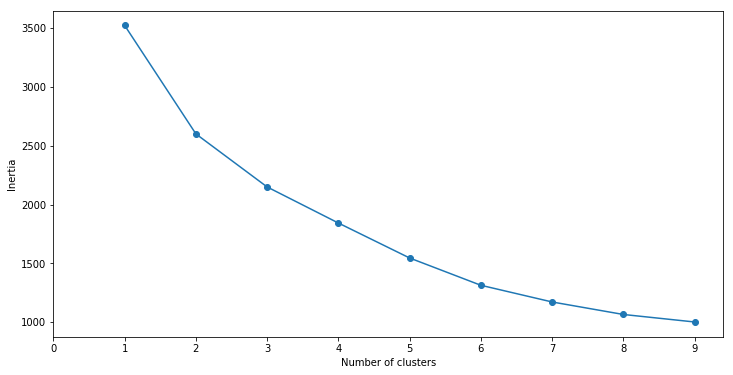

In [45]:
sc_X = StandardScaler()
X = sc_X.fit_transform(df)

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    model = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    model.fit(X)
    SSE.append(model.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(10));

2.Using k=2, predict the category of the first item in the dataset.

In [51]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

model = KMeans(n_clusters=2)
model.fit(X)

model.predict([X[0]])

array([1], dtype=int32)

3.Plot the unscaleed milk value (column #3) on the x-axis and the unscaled frozen value (column #5) on the y-axis, along with the clusters and the cluster centroids. You should see pretty clear separation between the two clusters.

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[1.99253731e+00, 2.63432836e+00, 8.44759701e+03, 1.14652985e+04,
        1.70927910e+04, 1.73723134e+03, 7.62686567e+03, 2.12214925e+03],
       [1.02941176e+00, 2.50326797e+00, 1.35560556e+04, 3.31374837e+03,
        3.94813072e+03, 3.65640850e+03, 8.03454248e+02, 1.26331699e+03]])

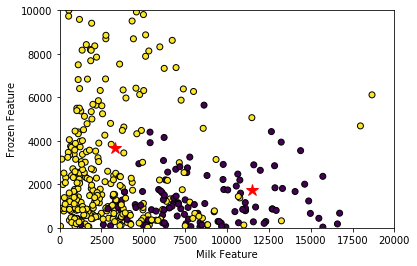

In [56]:
X=df

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

model = KMeans(n_clusters=2)
model.fit(X)

X = sc_X.inverse_transform(X)

model.cluster_centers_ = sc_X.inverse_transform([model.cluster_centers_])

x_coord = [point[3] for point in X]
y_coord = [point[5] for point in X]

plt.scatter(x_coord, y_coord, c=model.labels_.astype(np.float), edgecolor='k')
plt.xlabel('Milk Feature')
plt.ylabel('Frozen Feature')

for cluster in model.cluster_centers_[0]:
    plt.plot(cluster[3], cluster[5], 'r*', markersize=12)
plt.xlim((0,20000))
plt.ylim((0,10000))
model.cluster_centers_[0]

4.Create an algorithm called k_means that takes in a list of points and a number of clusters and returns a list of labels corresponding to each point's cluster. The function should also print the cluster centroids. For simplicity, let's assume that each point contains only two dimensions. Here's a simple example to test your output:

```python
print('Labels: ', k_means([[4,2], [2,1], [0,3], [5,1], [2,6]], 2))
```
```
Centroids:  [[1.3333333333333333, 3.3333333333333335], [4.5, 1.5]]
Labels:  [1, 0, 0, 1, 0]
```

In [131]:
import random

def distance(point1, point2):
    return np.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)

def k_means(points, k):
    centroids = random.sample(points, 2)

    for i in range(1000):
        labels = []
        for point in points:
            distances = [distance(point, centroid) for centroid in centroids]
            labels.append(distances.index(min(distances)))

        centroids = []
        for i in range(k):
            cluster_points = [points[j] for j in range(len(points)) if labels[j] == i ]
            x_coord, y_coord = np.mean([point[0] for point in cluster_points]), np.mean([point[1] for point in cluster_points])
            centroids.append([x_coord, y_coord])
    print('Centroids: ', centroids)
    return labels

print('Labels: ', k_means([[4,2], [2,1], [0,3], [5,1], [2,6]], 2))
        

Centroids:  [[1.3333333333333333, 3.3333333333333335], [4.5, 1.5]]
Labels:  [1, 0, 0, 1, 0]


5.To test your function on a more interesting dataset, let's return to our grocery example of milk versus frozen expenditures. Does your function and the sci-kit learn KMeans function predict similar labels using k=2 clusters? Note that the labels may be exactly the same or exactly the opposite (which still is fine) based on what label (0 or 1) each algorithm chose to use for each of the two groups.

In [135]:
#Create points containing just the milk and frozen values
points = [[row['Milk'], row['Frozen']] for index, row in df.iterrows()]

#Run my own algorithm
mylabels = k_means(points, 2)

#Run sci-kit learn's algorithm
model = KMeans(n_clusters=2)
model.fit(X)

#Compare the two labels
for index, row in X.iterrows():
    print(mylabels[index], model.predict([row])[0])

Centroids:  [[29296.875, 8222.041666666666], [4440.461538461538, 2774.810096153846]]
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1